## Parte III – Validação Holdout em Problema Não-Linearmente Separável
### Redes Neurais Artificiais - PP2
### Autor: Dayvson Silva - 1915310007
### Data: 05/09/2020

Esta tarefa consistiu em aplicar o percetron de Rosenblatt em uma tarefa Não-linearmente Separável, O primeiro passo foi implementar o percetron em Forma de classe para que a sua ultização posterior tivesse mais clareza. No primeiro momento foi plotado em um  Scatter plot o conjunto de dados, para se comprovar que se tratava de um problema não-linear.

## Importando as bibliotecas usadas na tarefa

In [2]:
import random
import itertools
import numpy as np
from matplotlib import pyplot as plt
from math import ceil, floor


## Lendo os dados do arquivo dataHoldout.txt

Ao realizar a leitura é todos os exemplos das entradas estão em uma mesma dimensão por isso, foi realizado um reshape no conjunto de dados.

In [4]:
dataset = np.fromfile('../dados/dataHoldout.txt')
number_instances = dataset.shape[0] // 3 ## 3 é quantidade de colunas
dataset = dataset.reshape(number_instances, 3)
dataset

array([[-0.29322959, -0.09065359,  1.        ],
       [ 0.07988839,  0.21101297,  1.        ],
       [-0.07825563, -0.08083512,  1.        ],
       ...,
       [ 0.65980493,  1.05876739,  0.        ],
       [ 1.09867123,  0.87404891,  0.        ],
       [ 0.72930655,  0.93224271,  0.        ]])

## Plotando o conjunto de dados

Imprimindo o cojunto de dados para identificar como os dados estão distribuidos, com a impressão fica claro que os dados são estão dispostos como um problema linear.

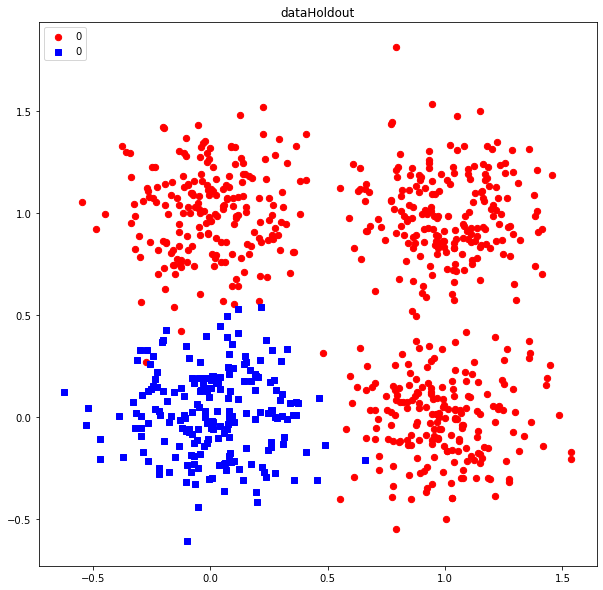

In [50]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1,1,1)
x = dataset[:,0][dataset[:, 2] == 0.0] # seleciona colunas 0 e targe 0
y = dataset[:,1][dataset[:, 2] == 0.0] # seleciona colunas 1 e targe 0
ax.scatter(x, y, c='r', s=40, marker='o', label='0')
x = dataset[:,0][dataset[:, 2] == 1.0] # seleciona colunas 0 e targe 1
y = dataset[:,1][dataset[:, 2] == 1.0] # seleciona colunas 1 e targe 1
ax.scatter(x, y, c='b', s=40, marker='s', label='0')
ax.set_title('dataHoldout')
plt.legend(loc='upper left')
plt.show()

In [11]:
#TODO: criar uma função de fronteira que delimite a os grupos

## Separando os dados em treino e teste

Criando funções para dividir o dataset em treino e teste e plotar esses dados para visualizar como eles estão dispostos

```
@method: criate data train and test

@parameters: dataset, percent

@return: x train and test and y train and test
```

number_instances_train=560
number_instances_test=240


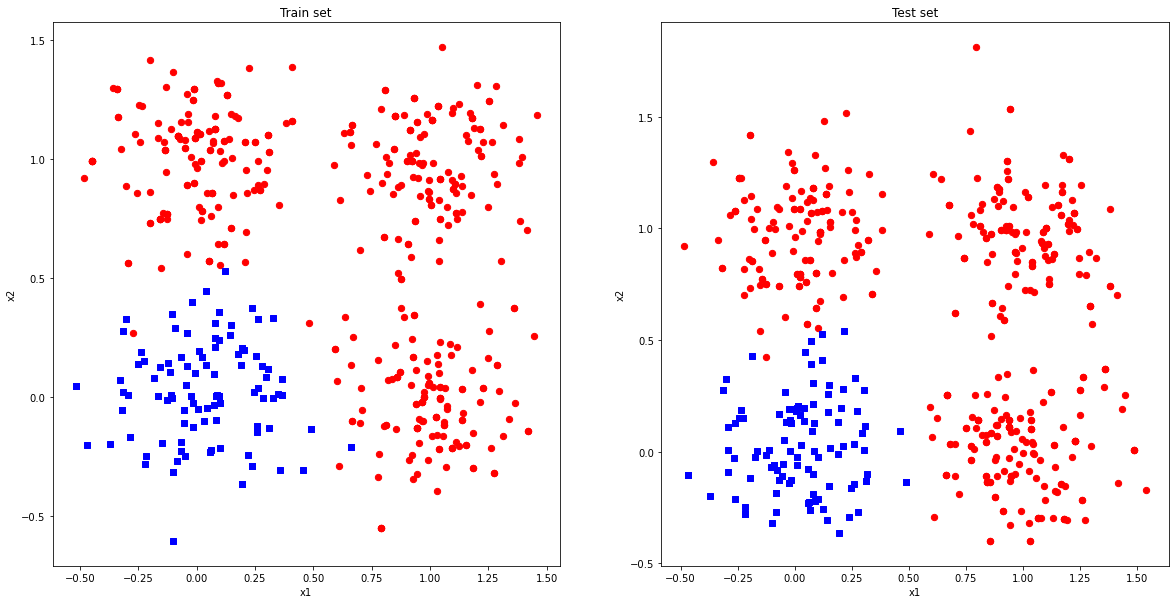

In [43]:
plt.figure(figsize=(20, 10))
def plot_set1(d, title, number_graph):
    plt.subplot(1, 2, number_graph)
    plt.scatter(d[:,0][d[:,2] == 0.0], d[:,1][d[:,2] == 0.0], marker='o', color='red', s=40)
    plt.scatter(d[:,0][d[:,2] == 1.0], d[:,1][d[:,2] == 1.0], marker='s', color='blue', s=40)
    plt.title(title)
    plt.ylabel('x2')
    plt.xlabel('x1')

def train_test_split(dataset, percent_train=.7):
    number_instances_train = ceil(len(dataset)*percent_train)
    number_instances_test = len(dataset) - number_instances_train
    print(f'number_instances_train={number_instances_train}')
    print(f'number_instances_test={number_instances_test}')
    index = np.random.randint(low=0, high=len(dataset), size=number_instances_train)
    plot_set1(dataset[index], 'Train set', 1)
    plot_set1(dataset[~index], 'Test set', 2)
    x_train = dataset[index][:,[0,1]]
    y_train = dataset[index][:, 2]
    x_test = dataset[~index][:, [0,1]]
    y_test = dataset[~index][:, 2]
    return x_train, y_train, x_test, y_test

x_train, y_train, x_test, y_test = train_test_split(dataset, .7)

## Importando o perceptron de Rosenblatt

*** Esta classe foi implemanta por mim e está no arquivo '../src/Perceptron.py'

In [15]:
import sys
sys.path.append('../')
from src.Perceptron import Perceptron

## Treinando um percetron com o conjuntos de treinamento

In [17]:
perceptron = Perceptron(no_of_inputs=2)
perceptron.fit(x_train, y_train)


	Época: 1
Pesos: [0.19517056 0.59594413 0.13517101]
Quantidade de Ajustes: 0

	Época: 2
Pesos: [-0.00482944 -0.03187345 -0.03035466]
Quantidade de Ajustes: 158

	Época: 3
Pesos: [-0.02482944 -0.03358524 -0.03706607]
Quantidade de Ajustes: 194

	Época: 4
Pesos: [-0.01482944 -0.03834979 -0.04203532]
Quantidade de Ajustes: 227

	Época: 5
Pesos: [-0.01482944 -0.03821298 -0.04676149]
Quantidade de Ajustes: 259

	Época: 6
Pesos: [-0.02482944 -0.04747494 -0.04201025]
Quantidade de Ajustes: 290

	Época: 7
Pesos: [-0.02482944 -0.0377819  -0.05164575]
Quantidade de Ajustes: 318

	Época: 8
Pesos: [-0.01482944 -0.04622726 -0.05330054]
Quantidade de Ajustes: 353

	Época: 9
Pesos: [-0.02482944 -0.04876924 -0.0489691 ]
Quantidade de Ajustes: 386

	Época: 10
Pesos: [-0.02482944 -0.04825274 -0.04580337]
Quantidade de Ajustes: 408

	Época: 11
Pesos: [-0.02482944 -0.03883526 -0.05106334]
Quantidade de Ajustes: 438

	Época: 12
Pesos: [-0.01482944 -0.05684716 -0.03857741]
Quantidade de Ajustes: 467

	Époc

## Fazendo a predição do conjunto de teste

In [19]:
y_pred = perceptron.predict(x_test)
y_pred

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
       1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

Gerando a matriz de confusão com os resultados preditos do conjunto de teste

In [21]:
results = np.array([y_test, y_pred])
true_positive = len(results[0][(results[0] == 1.0) & (results[1] == 1.0)])
true_negative = len(results[0][(results[0] == 0.0) & (results[1] == 0.0)])
false_positive = len(results[0][(results[0] == 0.0) & (results[1] == 1.0)])
false_negative = len(results[0][(results[0] == 1.0) & (results[1] == 0.0)])
confusion_matrix = np.array([[true_positive, false_positive], [false_negative,  true_negative]])
print(confusion_matrix)

[[104   1]
 [ 22 433]]


## Plotando a matriz de confusão

O código da plotagem matriz de confusão pode ser visto no link

In [23]:
def plot_confusion_matrix(cm, classes=['1', '0'], normalize=False, title='Confusion matrix', cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    
    # Plot the confusion matrix
    plt.figure(figsize = (5, 5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 18)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0, size = 10)
    plt.yticks(tick_marks, classes, size = 10)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20, horizontalalignment="center",
                                                color="white" if cm[i, j] > thresh else "black")
        
    #plt.grid(None)
    #plt.tight_layout()
    plt.ylabel('Predicted label', size = 15)
    plt.xlabel('True label', size = 15)

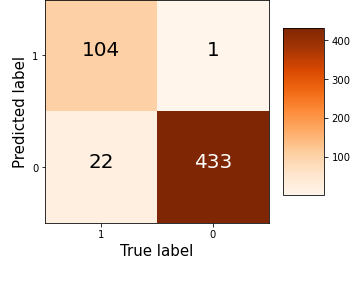

In [25]:
plot_confusion_matrix(cm = confusion_matrix,title='Confusion matrix')

## Metricas de Desempenho

### Acurácia

In [27]:
accuracy = (true_positive + true_negative) / (true_positive + true_negative + false_positive + false_negative)
accuracy

0.9589285714285715

### Precisão 

In [29]:
precision = true_positive/(true_positive + false_positive)
precision

0.9904761904761905

### Revocação

In [31]:
recall = true_positive/(true_positive + false_negative)
recall

0.8253968253968254

### F-Score

In [33]:
f_score = 2 * (precision * recall) / (precision + recall)
f_score

0.9004329004329005

## Plotando as soluções feitass com o perceptron

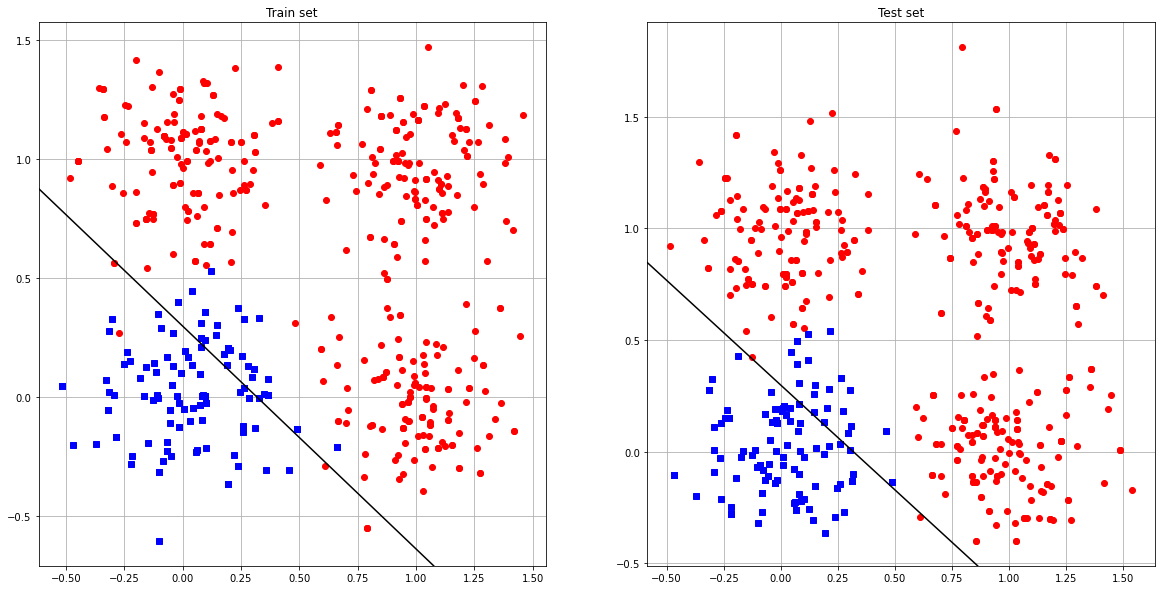

In [52]:

plt.figure(figsize=(20, 10))
def plot_data(inputs, targets, weights, number_graph, title=''):
    # fig config
    plt.subplot(1, 2, number_graph)
    plt.grid(True)
    for input,target in zip(inputs,targets):
        plt.plot(input[0],input[1],'bs' if (target == 1.0) else 'ro', label= '1' if (target == 1.0) else '0')
    plt.title(title)
    # [0, weights[0]/weights[2]], [weights[0]/weights[1], 0]
    slope = -(weights[0]/weights[2])/ (weights[0]/weights[1])
    plt.axline((0, weights[0]/weights[2]), slope=slope, color="black")

plot_data(x_train, y_train , perceptron.weights, 1, 'Train set')
plot_data(x_test, y_test , perceptron.weights, 2, 'Test set')